In [ ]:
import numpy as np
import pandas as pd

In [26]:
# Seaborn 오류 무시
import warnings
warnings.filterwarnings('ignore')

In [23]:
#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
test =pd.read_csv("C:/Users/student/Downloads/study/test.csv")
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train = pd.read_csv("C:/Users/student/Downloads/study/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.isnull().sum() # Null 값 개수 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
train.pivot_table('Survived', index='Sex') # 성별으로 생존률을 확인

,Survived
Sex,
female,0.742038
male,0.188908


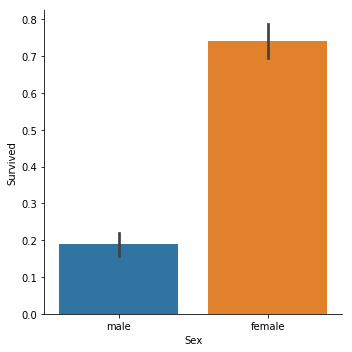

In [36]:
sns.catplot(x='Sex', y='Survived',  kind='bar', data=train) # 데이터 시각화

In [35]:
train.pivot_table('Survived', index='Sex', columns='Pclass') #성별과 객실등급으로 생존률을 확인

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


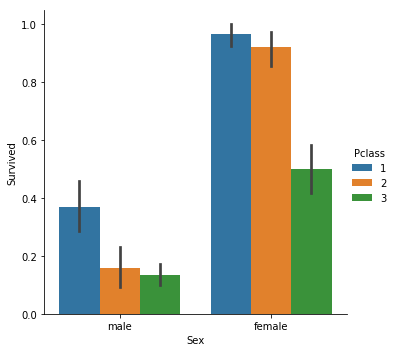

In [30]:
sns.catplot(x='Sex', y='Survived',  kind='bar', data=train, hue='Pclass') # 시각화

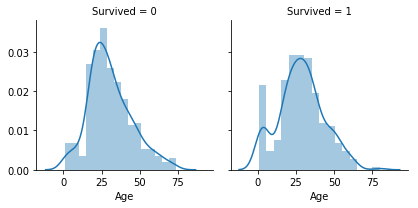

In [41]:
g = sns.FacetGrid(train, col='Survived') #생존자를 열로해서
g = g.map(sns.distplot, "Age") # 나이별로 확인

생존자는 어린아이가 상당히 높은 수치를 기록했고 정확하게 보기 위해 성별로도 나눠보자

In [54]:
train_male = train[train['Sex'] == "male"] # 남자만 있는 데이터 추출
train_male.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [55]:
train_female = train[train['Sex'] == "female"] # 여자만 있는 데이터 추출
train_female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


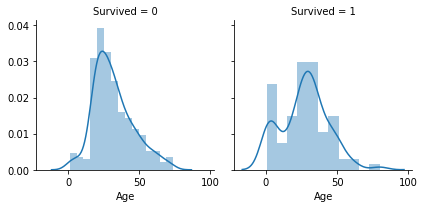

In [56]:
g = sns.FacetGrid(train_male, col='Survived') #남자 생존자를 열로해서
g = g.map(sns.distplot, "Age") # 나이별로 확인

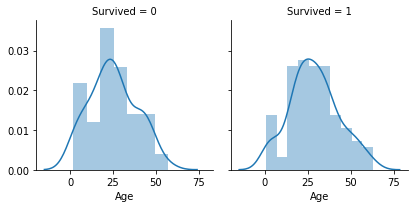

In [57]:
g = sns.FacetGrid(train_female, col='Survived') #여자 생존자를 열로해서
g = g.map(sns.distplot, "Age") # 나이별로 확인

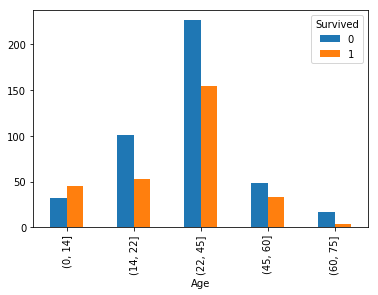

In [66]:
group = pd.cut(train.Age, [0,14,22,45,60,75]) # 나이별로 그룹화를
piv_fare = train.pivot_table(index=group, columns='Survived', values = 'Age', aggfunc='count')
piv_fare.plot(kind='bar')

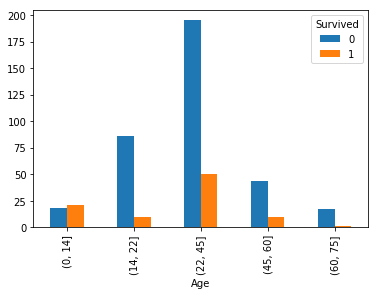

In [70]:
group = pd.cut(train_male.Age, [0,14,22,45,60,75]) # 남자 나이별로 그룹화
piv_fare = train_male.pivot_table(index=group, columns='Survived', values = 'Age', aggfunc='count')
piv_fare.plot(kind='bar')

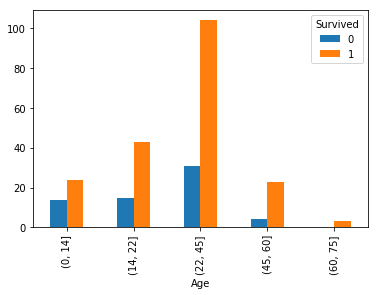

In [71]:
group = pd.cut(train_female.Age, [0,14,22,45,60,75]) # 여자 나이별로 그룹화
piv_fare = train_female.pivot_table(index=group, columns='Survived', values = 'Age', aggfunc='count')
piv_fare.plot(kind='bar')